# Funtion for calculating Derivative and critical point

In [1]:
using SymPy
using Plots

Enter the function (e.g., x^3 - 3*x^2 + 4): 


stdin>  (2*x^2 - 1)/(4*x + 9)


Enter the variable (e.g., x): 


stdin>  x


Original Function: f(x) = (2*x^2 - 1)/(4*x + 9)
First Derivative: f'(x) = 4*x/(4*x + 9) - 4*(2*x^2 - 1)/(4*x + 9)^2
Second Derivative: f''(x) = -32*x/(4*x + 9)^2 + 4/(4*x + 9) + 32*(2*x^2 - 1)/(4*x + 9)^3

Critical Points (where f'(x) = 0):
x = -4.386000936329383 is a local maximum (concave down).
x = -0.11399906367061721 is a local minimum (concave up).

Inflection Points (where f''(x) = 0):

Intervals of Increase/Decrease:
f(x) is increasing on the interval (-Inf, -4.386000936329383)
f(x) is constant on the interval (-4.386000936329383, -0.11399906367061721)
f(x) is increasing on the interval (-0.11399906367061721, Inf)


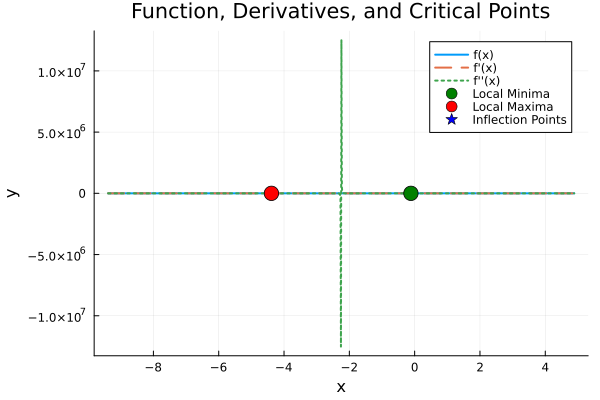

In [2]:

# Function to preprocess user input to insert '*' between numbers and variables
function preprocess_function_input(func_input)
    # Insert * between numbers and variables (e.g., 21x -> 21*x)
    return replace(func_input, r"([0-9])([a-zA-Z])" => s"\1*\2")
end

function analyze_and_display_solution()
    # Step 1: Ask the user to input the function and variable
    println("Enter the function (e.g., x^3 - 3*x^2 + 4): ")
    func_input = readline()  # Read the function input as a string
    func_input = preprocess_function_input(func_input)  # Preprocess the input
    println("Enter the variable (e.g., x): ")
    var_symbol = readline()

    # Step 2: Define the symbolic variable
    x = symbols(var_symbol)  # Create a symbolic variable
    
    # Step 3: Parse the function input using SymPy's sympify
    expr = sympify(func_input)  # Use sympify to convert the input string into a SymPy expression

    # Step 4: Compute first and second derivatives
    f_prime = diff(expr, x)
    f_double_prime = diff(f_prime, x)

    println("Original Function: f($var_symbol) = $expr")
    println("First Derivative: f'($var_symbol) = $f_prime")
    println("Second Derivative: f''($var_symbol) = $f_double_prime")

    # Step 5: Find critical points (f'(x) = 0) and inflection points (f''(x) = 0)
    critical_points = solve(f_prime, x)
    inflection_points = solve(f_double_prime, x)

    critical_points = [float(p) for p in critical_points if isreal(float(p))]
    inflection_points = [float(p) for p in inflection_points if isreal(float(p))]

    # Step 6: Classify critical points (minima, maxima)
    println("\nCritical Points (where f'(x) = 0):")
    minima, maxima = [], []
    for cp in critical_points
        concavity = subs(f_double_prime, x => cp)
        if concavity > 0
            push!(minima, cp)
            println("x = $cp is a local minimum (concave up).")
        elseif concavity < 0
            push!(maxima, cp)
            println("x = $cp is a local maximum (concave down).")
        else
            println("x = $cp is inconclusive (saddle point or flat region).")
        end
    end

    # Step 7: Find inflection points (f''(x) = 0)
    println("\nInflection Points (where f''(x) = 0):")
    for ip in inflection_points
        println("x = $ip is an inflection point.")
    end

    # Step 8: Analyze intervals of increasing and decreasing
    println("\nIntervals of Increase/Decrease:")
    if isempty(critical_points)
        println("No critical points found, cannot determine increasing or decreasing intervals.")
        return
    end

    # Include -∞ to +∞ in the intervals and sort critical points
    critical_points = sort(critical_points)
    interval_boundaries = vcat([-Inf], critical_points, [Inf])

    # Determine the sign of f'(x) in each interval and classify as increasing or decreasing
    for i in 1:length(interval_boundaries)-1
        lower_bound = interval_boundaries[i]
        upper_bound = interval_boundaries[i+1]
        
        # Use midpoint of the interval to check the sign of f'(x)
        mid_point = (lower_bound == -Inf) ? upper_bound - 1 : 
                    (upper_bound == Inf) ? lower_bound + 1 :
                    (lower_bound + upper_bound) / 2
        
        f_prime_at_mid = subs(f_prime, x => mid_point)

        if f_prime_at_mid > 0
            println("f(x) is increasing on the interval ($lower_bound, $upper_bound)")
        elseif f_prime_at_mid < 0
            println("f(x) is decreasing on the interval ($lower_bound, $upper_bound)")
        else
            println("f(x) is constant on the interval ($lower_bound, $upper_bound)")
        end
    end

    # Step 9: Plot the function, first and second derivatives, and critical points
    if !isempty(critical_points)
        x_vals = range(minimum(critical_points) - 5, maximum(critical_points) + 5, length=1000)
    else
        x_vals = range(-10, 10, length=1000)  # Default range if no critical points
    end

    f_vals = [subs(expr, x => xi) for xi in x_vals]
    f_prime_vals = [subs(f_prime, x => xi) for xi in x_vals]
    f_double_prime_vals = [subs(f_double_prime, x => xi) for xi in x_vals]

    # Plot the function
    plt = plot(x_vals, f_vals, label="f(x)", xlabel="x", ylabel="y", lw=2, title="Function, Derivatives, and Critical Points")

    # Plot the first and second derivatives
    plot!(x_vals, f_prime_vals, label="f'(x)", lw=2, linestyle=:dash)
    plot!(x_vals, f_double_prime_vals, label="f''(x)", lw=2, linestyle=:dot)

    # Mark critical points
    minima_y = [subs(expr, x => mi) for mi in minima]
    maxima_y = [subs(expr, x => ma) for ma in maxima]
    scatter!(minima, minima_y, label="Local Minima", marker=:circle, ms=8, color=:green)
    scatter!(maxima, maxima_y, label="Local Maxima", marker=:circle, ms=8, color=:red)

    # Mark inflection points
    inflection_y = [subs(expr, x => ip) for ip in inflection_points]
    scatter!(inflection_points, inflection_y, label="Inflection Points", marker=:star5, ms=8, color=:blue)

    display(plt)
end

# Call the function to ask for input and display the results
analyze_and_display_solution()


# Funtion for calculating MAX

Enter the coefficient of x^3 in the revenue function (e.g., 1): 


stdin>  0


Enter the coefficient of x^2 in the revenue function (e.g., 2): 


stdin>  -2


Enter the coefficient of x in the revenue function (e.g., 3): 


stdin>  10.5


Enter the constant term in the revenue function (e.g., 4): 


stdin>  0


Enter the coefficient of x^3 in the cost function (e.g., 1): 


stdin>  0


Enter the coefficient of x^2 in the cost function (e.g., 2): 


stdin>  0


Enter the coefficient of x in the cost function (e.g., 3): 


stdin>  3


Enter the constant term in the cost function (e.g., 4): 


stdin>  11


Profit function P(x): -2.0*x^2 + 7.5*x - 11.0
Derivative of P(x): 7.5 - 4.0*x
Critical points (maximum profit occurs at x): Sym{PyCall.PyObject}[1.87500000000000]
Maximum profit at x = 1.87500000000000: -3.96875000000000


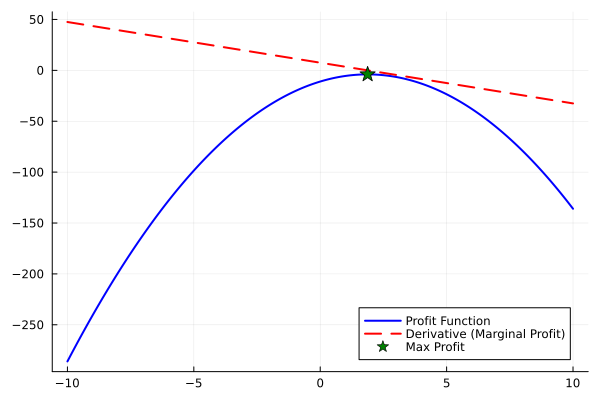

-3.96875000000000

In [14]:

# Choose a plotting backend (optional)
gr()  # or use plotly() if you'd like interactive plots

# Generalized function for profit maximization with cubic R(x) and C(x)
function maximize_cubic_profit()
    # Request input from the user (Jupyter-friendly)
    println("Enter the coefficient of x^3 in the revenue function (e.g., 1): ")
    a = parse(Float64, readline())
    
    println("Enter the coefficient of x^2 in the revenue function (e.g., 2): ")
    b = parse(Float64, readline())
    
    println("Enter the coefficient of x in the revenue function (e.g., 3): ")
    c = parse(Float64, readline())
    
    println("Enter the constant term in the revenue function (e.g., 4): ")
    d = parse(Float64, readline())
    
    println("Enter the coefficient of x^3 in the cost function (e.g., 1): ")
    e = parse(Float64, readline())
    
    println("Enter the coefficient of x^2 in the cost function (e.g., 2): ")
    f = parse(Float64, readline())
    
    println("Enter the coefficient of x in the cost function (e.g., 3): ")
    g = parse(Float64, readline())
    
    println("Enter the constant term in the cost function (e.g., 4): ")
    h = parse(Float64, readline())
    
    # Define the variable
    x = symbols("x")
    
    # Revenue function: R(x) = ax^3 + bx^2 + cx + d
    R = a * x^3 + b * x^2 + c * x + d
    
    # Cost function: C(x) = ex^3 + fx^2 + gx + h
    C = e * x^3 + f * x^2 + g * x + h
    
    # Profit function: P(x) = R(x) - C(x)
    P = R - C
    
    println("Profit function P(x): ", P)
    
    # Derivative of the profit function to find critical points
    P_prime = diff(P, x)
    println("Derivative of P(x): ", P_prime)
    
    # Solve for critical points (where P'(x) = 0)
    critical_points = solve(P_prime, x)
    println("Critical points (maximum profit occurs at x): ", critical_points)
    
    # Choose a real critical point (you can filter complex solutions if necessary)
    real_critical_points = [p for p in critical_points if isreal(p)]
    max_x = real_critical_points[1]
    
    # Calculate maximum profit by substituting the critical point into P(x)
    max_profit = subs(P, x, max_x)
    println("Maximum profit at x = $max_x: ", max_profit)
    
    # Plotting the profit function and its derivative
    f_profit(x_val) = float(subs(P, x, x_val))
    f_profit_prime(x_val) = float(subs(P_prime, x, x_val))
    
    # Define range for plotting
    x_vals = -10:0.1:10
    profit_vals = [f_profit(x_val) for x_val in x_vals]
    profit_prime_vals = [f_profit_prime(x_val) for x_val in x_vals]

    # Plot both functions
    plt = plot(x_vals, profit_vals, label="Profit Function", lw=2, color=:blue)
    plot!(plt, x_vals, profit_prime_vals, label="Derivative (Marginal Profit)", lw=2, color=:red, linestyle=:dash)

    # Mark the maximum profit point on the profit curve
    scatter!([float(max_x)], [float(max_profit)], label="Max Profit", color=:green, marker=:star, markersize=8)
    
    # Explicitly display the plot in Jupyter
    display(plt)
    
    return max_profit
end

# Call the function to allow user input
maximize_cubic_profit()


# Funtion for calculating MIN

Enter the coefficient of x^3 in the revenue function (e.g., 1): 


stdin>  1


Enter the coefficient of x^2 in the revenue function (e.g., 2): 


stdin>  -3


Enter the coefficient of x in the revenue function (e.g., 3): 


stdin>  2


Enter the constant term in the revenue function (e.g., 4): 


stdin>  5


Enter the coefficient of x^3 in the cost function (e.g., 1): 


stdin>  0.5


Enter the coefficient of x^2 in the cost function (e.g., 2): 


stdin>  2


Enter the coefficient of x in the cost function (e.g., 3): 


stdin>  3


Enter the constant term in the cost function (e.g., 4): 


stdin>  4


Profit function P(x): 0.5*x^3 - 5.0*x^2 - 1.0*x + 1.0
Derivative of P(x): 1.5*x^2 - 10.0*x - 1.0
Critical points: Sym{PyCall.PyObject}[-0.0985433803290001, 6.76521004699567]
Second derivative of P(x): 3.0*x - 10.0
Minimum profit at x = 6.76521004699567: -79.7902516646156


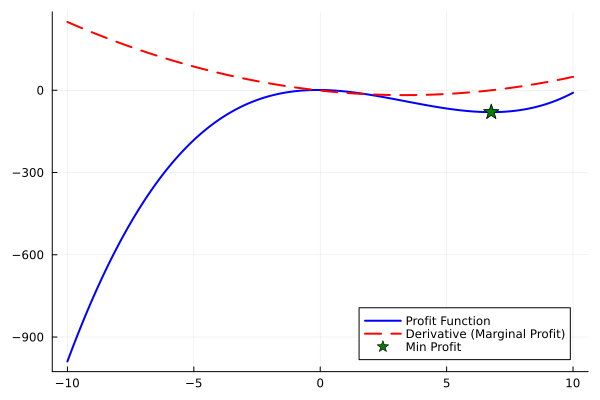

-79.7902516646156

In [17]:

# Choose a plotting backend (optional)
gr()  # or use plotly() if you'd like interactive plots

# Generalized function for cubic profit minimization with user inputs
function minimize_cubic_profit()
    # Request input from the user (Jupyter-friendly)
    println("Enter the coefficient of x^3 in the revenue function (e.g., 1): ")
    a = parse(Float64, readline())
    
    println("Enter the coefficient of x^2 in the revenue function (e.g., 2): ")
    b = parse(Float64, readline())
    
    println("Enter the coefficient of x in the revenue function (e.g., 3): ")
    c = parse(Float64, readline())
    
    println("Enter the constant term in the revenue function (e.g., 4): ")
    d = parse(Float64, readline())
    
    println("Enter the coefficient of x^3 in the cost function (e.g., 1): ")
    e = parse(Float64, readline())
    
    println("Enter the coefficient of x^2 in the cost function (e.g., 2): ")
    f = parse(Float64, readline())
    
    println("Enter the coefficient of x in the cost function (e.g., 3): ")
    g = parse(Float64, readline())
    
    println("Enter the constant term in the cost function (e.g., 4): ")
    h = parse(Float64, readline())
    
    # Define the variable
    x = symbols("x")
    
    # Revenue function: R(x) = ax^3 + bx^2 + cx + d
    R = a * x^3 + b * x^2 + c * x + d
    
    # Cost function: C(x) = ex^3 + fx^2 + gx + h
    C = e * x^3 + f * x^2 + g * x + h
    
    # Profit function: P(x) = R(x) - C(x)
    P = R - C
    
    println("Profit function P(x): ", P)
    
    # Derivative of the profit function to find critical points
    P_prime = diff(P, x)
    println("Derivative of P(x): ", P_prime)
    
    # Solve for critical points (where P'(x) = 0)
    critical_points = solve(P_prime, x)
    println("Critical points: ", critical_points)
    
    # Second derivative to test for minima
    P_double_prime = diff(P_prime, x)
    println("Second derivative of P(x): ", P_double_prime)
    
    # Filter real critical points and check for minima
    real_critical_points = [p for p in critical_points if isreal(p)]
    
    # Check each critical point to determine if it's a minimum
    minimum_points = []
    for point in real_critical_points
        second_derivative_at_point = subs(P_double_prime, x, point)
        if second_derivative_at_point > 0
            push!(minimum_points, point)
        end
    end

    if length(minimum_points) == 0
        println("No local minima found.")
        return
    end

    # Choose the first minimum point
    min_x = minimum_points[1]
    min_profit = subs(P, x, min_x)
    println("Minimum profit at x = $min_x: ", min_profit)
    
    # Plotting the profit function and its derivative
    f_profit(x_val) = float(subs(P, x, x_val))
    f_profit_prime(x_val) = float(subs(P_prime, x, x_val))
    
    # Define range for plotting
    x_vals = -10:0.1:10
    profit_vals = [f_profit(x_val) for x_val in x_vals]
    profit_prime_vals = [f_profit_prime(x_val) for x_val in x_vals]

    # Plot both functions
    plt = plot(x_vals, profit_vals, label="Profit Function", lw=2, color=:blue)
    plot!(plt, x_vals, profit_prime_vals, label="Derivative (Marginal Profit)", lw=2, color=:red, linestyle=:dash)

    # Mark the minimum profit point on the profit curve
    scatter!([float(min_x)], [float(min_profit)], label="Min Profit", color=:green, marker=:star, markersize=8)
    
    # Explicitly display the plot in Jupyter
    display(plt)
    
    return min_profit
end

# Call the function to allow user input
minimize_cubic_profit()


# Funtion for calculating Marginal Profits

Enter the profit function (e.g., sqrt(2*x^6 - 9*x^2)): 


stdin>  sqrt(2*x^6 - 9*x^2)


Profit function P(x): sqrt(2*x^6 - 9*x^2)
Marginal profit (P'(x)): (6*x^5 - 9*x)/sqrt(2*x^6 - 9*x^2)
Second derivative (P''(x)): (30*x^4 - 9)/sqrt(2*x^6 - 9*x^2) + (-6*x^5 + 9*x)*(6*x^5 - 9*x)/(2*x^6 - 9*x^2)^(3/2)
Real critical points: [-1.1066819197003217, 1.1066819197003217]
At x = -1.1066819197003217, there is a local minimum.
At x = 1.1066819197003217, there is a local minimum.


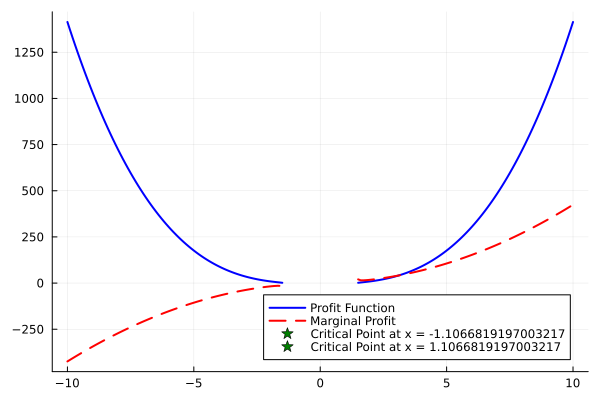

In [33]:
using SymPy
using Plots

# Function to handle symbolic inputs and solve for profit and marginal profit
function solve_sqrt_profit()
    # Request input from the user for the profit function
    println("Enter the profit function (e.g., sqrt(2*x^6 - 9*x^2)): ")
    profit_input = readline()

    # Define the variable
    x = symbols("x")
    
    # Parse the input into a SymPy expression using sympify
    P = sympify(profit_input)
    println("Profit function P(x): ", P)
    
    # Derivative of the profit function (marginal profit)
    P_prime = diff(P, x)
    println("Marginal profit (P'(x)): ", P_prime)
    
    # Second derivative for identifying maxima and minima
    P_double_prime = diff(P_prime, x)
    println("Second derivative (P''(x)): ", P_double_prime)
    
    # Solve for critical points (where P'(x) = 0)
    critical_points = solve(P_prime, x)
    # Filter only real critical points
    real_critical_points = [float(p) for p in critical_points if isreal(p)]
    println("Real critical points: ", real_critical_points)
    
    # Determine whether each critical point is a maximum or minimum using the second derivative test
    for point in real_critical_points
        second_derivative_at_point = subs(P_double_prime, x, point)
        if second_derivative_at_point > 0
            println("At x = $point, there is a local minimum.")
        elseif second_derivative_at_point < 0
            println("At x = $point, there is a local maximum.")
        else
            println("At x = $point, it is a saddle point or inflection point.")
        end
    end
    
    # Create anonymous functions for profit and marginal profit to handle real numbers only
    f_profit = x_val -> begin
        result = subs(P, x, x_val)
        return isreal(result) ? float(result) : NaN
    end
    f_profit_prime = x_val -> begin
        result = subs(P_prime, x, x_val)
        return isreal(result) ? float(result) : NaN
    end
    
    # Define range for plotting
    x_vals = -10:0.1:10
    
    # Generate values for plotting using the real functions only
    profit_vals = [f_profit(x_val) for x_val in x_vals]
    profit_prime_vals = [f_profit_prime(x_val) for x_val in x_vals]

    # Create the plot
    plt = plot(x_vals, profit_vals, label="Profit Function", lw=2, color=:blue)
    plot!(plt, x_vals, profit_prime_vals, label="Marginal Profit", lw=2, color=:red, linestyle=:dash)

    # Mark the critical points on the profit curve
    for point in real_critical_points
        profit_at_point = f_profit(point)
        scatter!([point], [profit_at_point], label="Critical Point at x = $point", color=:green, marker=:star, markersize=8)
    end
    
    # Explicitly display the plot
    display(plt)
end

# Call the function to allow user input
solve_sqrt_profit()


# Function solve Velocity and Acceleration 


Enter the time 't' (in seconds): 


stdin>  3



Symbolic Expression for Velocity v(t):
10*t + 16 + t^(-2)

Symbolic Expression for Acceleration a(t):
10 - 2/t^3

At time t = 3.0 seconds:
Position: 92.6666666666667 feet
Velocity: 46.1111111111111 feet per second
Acceleration: 9.92592592592593 feet per second squared
Changing Speed (Absolute Velocity): 46.1111111111111 feet per second


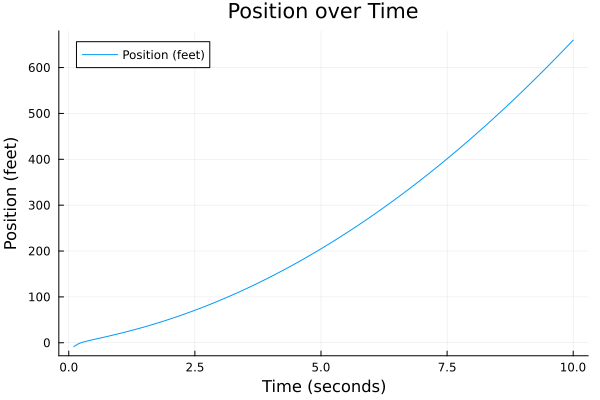

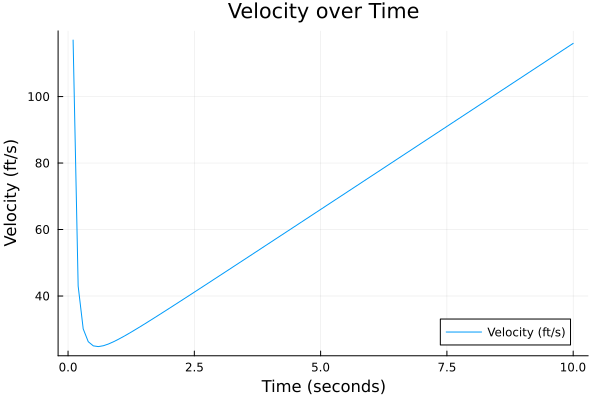

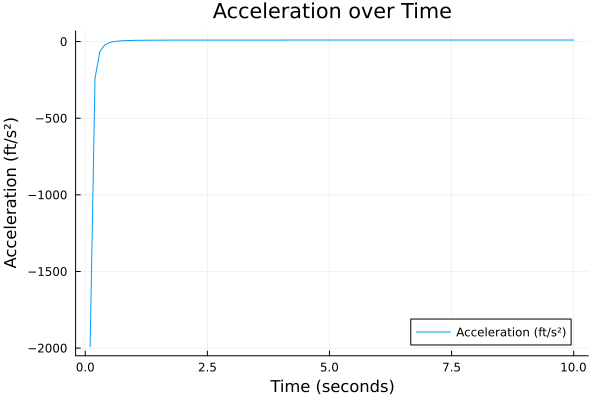


Plots saved as position_plot.png, velocity_plot.png, and acceleration_plot.png


In [21]:
using SymPy  # For symbolic computation
using Plots  # For plotting

# Define the function to take user input and convert to a symbolic expression
function main_function_input()
    # In this case, we directly define the function instead of taking input for simplicity
    t = symbols("t")  # Define the symbolic variable 't'
    
    # Define the position function p(t) = 5*t^2 + 16*t - 1/t
    expr_sympy = 5 * t^2 + 16 * t - 1/t
    
    return expr_sympy, t
end

# Function to calculate velocity (first derivative of position)
function velocity_function(expr, t_symbol)
    return diff(expr, t_symbol)
end

# Function to calculate acceleration (second derivative of position)
function acceleration_function(expr, t_symbol)
    return diff(diff(expr, t_symbol), t_symbol)
end

# Function to calculate changing speed (absolute value of velocity)
function changing_speed_function(velocity_expr, t_symbol, t_value)
    return abs(subs(velocity_expr, t_symbol => t_value))
end

# Function to calculate and display the results at a specific time 't'
function calculate_and_display(expr, t_symbol, t_value)
    # Calculate velocity and acceleration expressions
    velocity_expr = velocity_function(expr, t_symbol)
    acceleration_expr = acceleration_function(expr, t_symbol)

    # Evaluate the expressions at the provided time
    position = subs(expr, t_symbol => t_value)
    velocity = subs(velocity_expr, t_symbol => t_value)
    acceleration = subs(acceleration_expr, t_symbol => t_value)
    changing_speed = changing_speed_function(velocity_expr, t_symbol, t_value)

    # Display the symbolic expressions
    println("\nSymbolic Expression for Velocity v(t):")
    println(velocity_expr)

    println("\nSymbolic Expression for Acceleration a(t):")
    println(acceleration_expr)

    # Display the results
    println("\nAt time t = $t_value seconds:")
    println("Position: $position feet")
    println("Velocity: $velocity feet per second")
    println("Acceleration: $acceleration feet per second squared")
    println("Changing Speed (Absolute Velocity): $changing_speed feet per second")
end

# Function to plot the values over time
function plot_results(expr, t_symbol)
    # Time range for plotting
    t_values = 0.1:0.1:10  # From 0.1 to 10 seconds
    position_values = [subs(expr, t_symbol => t) for t in t_values]
    velocity_expr = velocity_function(expr, t_symbol)
    velocity_values = [subs(velocity_expr, t_symbol => t) for t in t_values]
    acceleration_expr = acceleration_function(expr, t_symbol)
    acceleration_values = [subs(acceleration_expr, t_symbol => t) for t in t_values]

    # Plot position over time
    p1 = plot(t_values, position_values, label="Position (feet)", xlabel="Time (seconds)", ylabel="Position (feet)", title="Position over Time")
    display(p1)
    savefig(p1, "position_plot.png")

    # Plot velocity over time
    p2 = plot(t_values, velocity_values, label="Velocity (ft/s)", xlabel="Time (seconds)", ylabel="Velocity (ft/s)", title="Velocity over Time")
    display(p2)
    savefig(p2, "velocity_plot.png")

    # Plot acceleration over time
    p3 = plot(t_values, acceleration_values, label="Acceleration (ft/s²)", xlabel="Time (seconds)", ylabel="Acceleration (ft/s²)", title="Acceleration over Time")
    display(p3)
    savefig(p3, "acceleration_plot.png")

    println("\nPlots saved as position_plot.png, velocity_plot.png, and acceleration_plot.png")
end

# Main program
# Get the main function for position p(t) = 5*t^2 + 16*t - 1/t
expr, t_symbol = main_function_input()

# Prompt the user to enter the time 't'
println("\nEnter the time 't' (in seconds): ")
t_value = parse(Float64, readline())  # Reads and parses user input to a Float64 value

# Call the generalized function to calculate and display results for the given time
calculate_and_display(expr, t_symbol, t_value)

# Call the plot_results function to generate plots
plot_results(expr, t_symbol)
